In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
#mypath = "C:/Users/ruilliu/Documents/nuevo_lr _ fifa/" # change it to your own path
fifa_data = pd.read_csv("E:\Data Science Projects\Fifa 21 data analysis\dataset\players_21.csv")
fifa_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [23]:
print(fifa_data['team_position'].dropna().unique())

['CAM' 'LS' 'GK' 'ST' 'LW' 'RCM' 'LCB' 'RW' 'SUB' 'CF' 'CDM' 'RDM' 'RS'
 'LCM' 'RB' 'LB' 'LM' 'RCB' 'LF' 'CB' 'RM' 'LDM' 'RF' 'RES' 'LWB' 'CM'
 'LAM' 'RWB' 'RAM']


In [18]:
fifa_data_by_pos = fifa_data[fifa_data['team_position']=='ST']
fifa_data_by_pos

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
21,202126,https://sofifa.com/player/202126/harry-kane/21...,H. Kane,Harry Kane,26,1993-07-28,188,89,England,Tottenham Hotspur,...,65+3,66+3,66+3,66+3,65+3,62+3,61+3,61+3,61+3,62+3
45,194765,https://sofifa.com/player/194765/antoine-griez...,A. Griezmann,Antoine Griezmann,29,1991-03-21,176,73,France,FC Barcelona,...,73+3,71+3,71+3,71+3,73+3,70+3,65+3,65+3,65+3,70+3
61,208830,https://sofifa.com/player/208830/jamie-vardy/2...,J. Vardy,Jamie Vardy,33,1987-01-11,179,74,England,Leicester City,...,68+3,64+3,64+3,64+3,68+3,67+3,64+3,64+3,64+3,67+3
73,212188,https://sofifa.com/player/212188/timo-werner/2...,T. Werner,Timo Werner,24,1996-03-06,180,76,Germany,Chelsea,...,61+3,56+3,56+3,56+3,61+3,58+3,50+3,50+3,50+3,58+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18038,255673,https://sofifa.com/player/255673/david-barreto...,D. Barreto,David Enrique Barreto Benítez,23,1997-06-09,175,73,Venezuela,Llaneros de Guanare,...,43+2,38+2,38+2,38+2,43+2,41+2,35+2,35+2,35+2,41+2
18091,257495,https://sofifa.com/player/257495/luis-lawrie-l...,L. Lawrie-Lattanzio,Luis Lawrie-Lattanzio,18,2002-02-20,172,64,Australia,Melbourne Victory,...,41+2,36+2,36+2,36+2,41+2,38+2,30+2,30+2,30+2,38+2
18261,255818,https://sofifa.com/player/255818/jhon-pereira/...,J. Pereira,Jhon Sergio Pereira Cortéz,21,1998-09-03,185,67,Ecuador,SD Aucas,...,36+2,33+2,33+2,33+2,36+2,34+2,29+2,29+2,29+2,34+2
18811,257518,https://sofifa.com/player/257518/oscar-taty-ma...,O. Maritu,Oscar Taty Maritu,20,1999-08-17,182,80,DR Congo,Shijiazhuang Ever Bright F.C.,...,32+2,29+2,29+2,29+2,32+2,31+2,30+2,30+2,30+2,31+2


In [26]:
train_data, test_data = train_test_split(fifa_data_by_pos,test_size=0.25)

# print the number of players in train_data and test_data
# len() gives you the number of players in numerical format
# str() converts numerical value into string


print("The # of training data is " + str(len(train_data)))
print("The # of testing data is " + str(len(test_data)))

The # of training data is 339
The # of testing data is 113


In [30]:
import pandas as pd

# Assuming 'train_data' is your DataFrame

target = "overall"

# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['number'])

# To find the correlation among the numeric columns using the Pearson method
feature_corr = numeric_columns.corr(method='pearson').loc[target]

# Sort the features
feature_corr = feature_corr.sort_values(ascending=False)

# Show the top 20 features
# Note that we are starting from 1, not zero, because Overall is always on the top of the list
print(feature_corr[1:21])
 

shooting                      0.938159
attacking_finishing           0.915238
mentality_positioning         0.905795
movement_reactions            0.880581
skill_ball_control            0.873301
attacking_short_passing       0.844404
dribbling                     0.832049
skill_dribbling               0.819914
mentality_composure           0.818842
power_shot_power              0.815526
potential                     0.799045
power_long_shots              0.788884
attacking_volleys             0.767377
passing                       0.758204
value_eur                     0.757125
release_clause_eur            0.740073
mentality_vision              0.688433
mentality_penalties           0.626437
attacking_heading_accuracy    0.620207
wage_eur                      0.595421
Name: overall, dtype: float64


In [39]:
features = ["pace", "shooting", "passing", "dribbling", 
            "defending",  "defending"]

In [35]:
# features = feature_corr[1:21].index.tolist()

# # show the features
# print(features)

In [40]:
x_train = train_data[features]
y_train = train_data[target]

# Applying Linear regression
# fit() is the method to train the model
model = LinearRegression().fit(x_train,y_train)

# Model's score
print("Score: " + str(model.score(x_train,y_train)))

Score: 0.9383096904762731


In [41]:
test_data = test_data.sort_values([target], ascending=False)

x_test = test_data[features]
y_test = test_data[target]

y_pred = model.predict(x_test)

In [43]:
test_data['Predicted Overall'] = y_pred.copy()

# add a new column of prediction difference ratio to test_data
difference = (y_pred - y_test) / y_test * 100
test_data['Difference (%)'] = difference

# print the results
test_data[["short_name", "nationality", "club_name", "overall", "Predicted Overall", "Difference (%)"]]

,short_name,nationality,club_name,overall,Predicted Overall,Difference (%)
3,R. Lewandowski,Poland,FC Bayern München,91,88.660053,-2.571371
21,H. Kane,England,Tottenham Hotspur,88,87.560280,-0.499682
73,T. Werner,Germany,Chelsea,85,84.517368,-0.567803
135,W. Ben Yedder,France,AS Monaco,84,83.708602,-0.346902
106,A. Martial,France,Manchester United,84,84.013447,0.016008
...,...,...,...,...,...,...
14720,L. Nițu,Romania,Gaz Metan Mediaş,60,62.183938,3.639896
15446,E. Díaz,Argentina,Club Atlético Tigre,60,61.255563,2.092605
15269,R. Coughlan,Republic of Ireland,Sligo Rovers,60,60.132426,0.220710
18091,L. Lawrie-Lattanzio,Australia,Melbourne Victory,53,51.338827,-3.134289


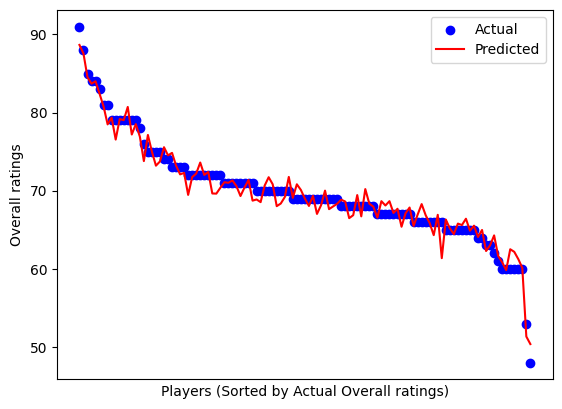

In [44]:
plt.scatter(range(0,y_test.shape[0]), y_test,  color='blue', label="Actual")
plt.plot(range(0,y_test.shape[0]), y_pred, color='red', label="Predicted")

# add ticks, labels, legend
plt.xticks(())
plt.xlabel("Players (Sorted by Actual Overall ratings)")
plt.ylabel("Overall ratings")
plt.legend(loc='upper right')
plt.show()